# Real Time AQ Data

Realtime RAMP AQ data from the WFRT rooftop is read in with the function below every 15 minutes.

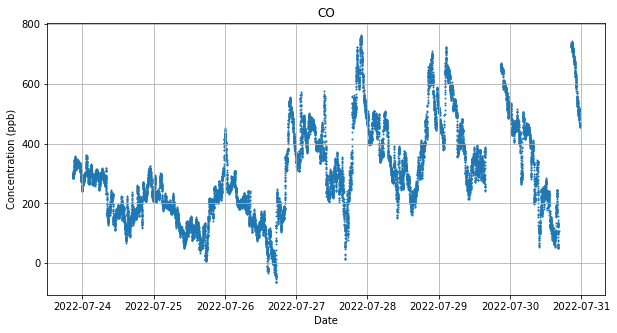

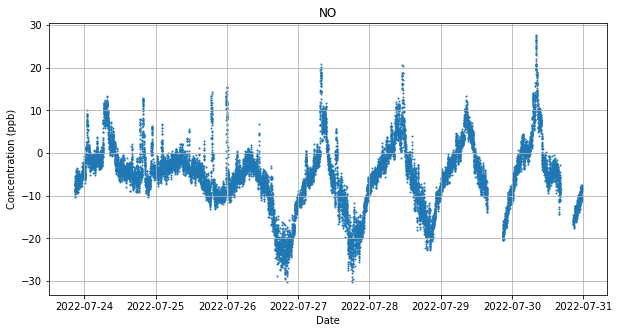

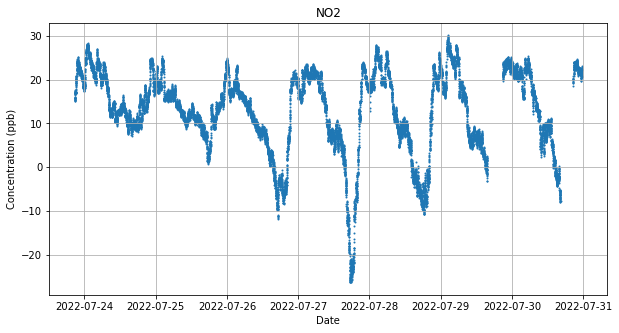

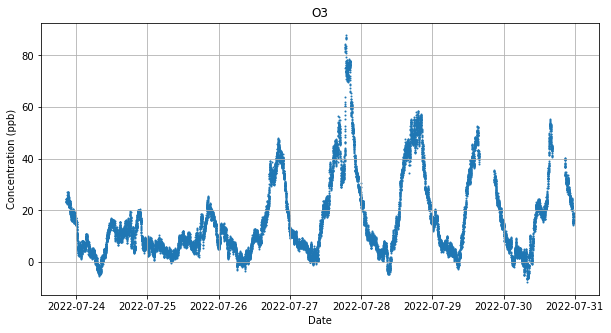

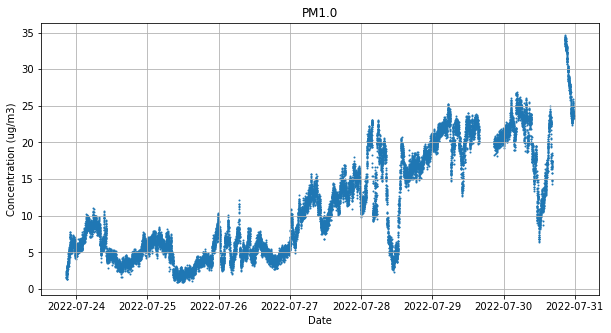

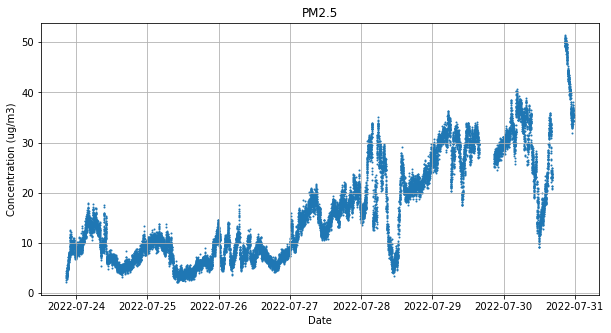

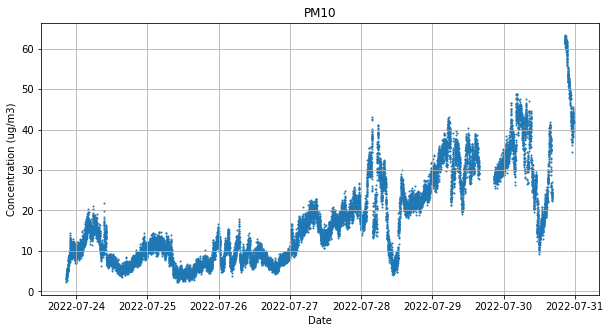

In [1]:
from func import run

run()